# GRIP: The Sparks Foundation

## Data Science & Business Analytics Intern

### AUTHOR: Flemy Roy

### Task 6: Create the Decision Tree classifier and visualize it graphically


In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#Loading Data into a Dataframe
df=pd.read_csv("iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Data Preprocessing

In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Null Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df=df.drop('Id',axis=1)

In [8]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Dropping 'Id' column as does not offer substantial insight into the data

#### Data Cleaning

<AxesSubplot:>

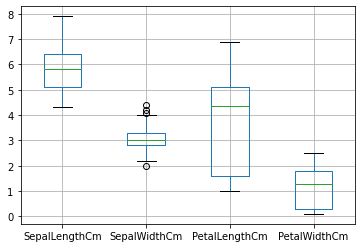

In [9]:
df.boxplot()

Prescence of outliers detected in 'SepalWidth'

In [11]:
#Detecting Outliers
q1=df['SepalWidthCm'].quantile(0.25)
q3=df['SepalWidthCm'].quantile(0.75)
IQR=q3-q1
lowerfence=q1-1.5*IQR
upperfence=q3+1.5*IQR
df3 = df[(df['SepalWidthCm']<lowerfence) | (df['SepalWidthCm']>upperfence)]
print("Number of Outliers in Sepal Width:",df3.shape[0])

Number of Outliers in Sepal Width: 4


In [12]:
#Removing the Outliers
for i,data in df.iterrows():
    if data['SepalWidthCm']<q1:
        df.at[i,'SepalWidthCm']=lowerfence 
    elif data['SepalWidthCm']>q3:
        df.at[i,'SepalWidthCm']=upperfence 

<AxesSubplot:>

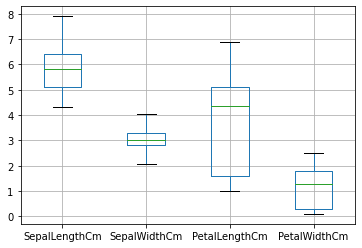

In [13]:
df.boxplot()

#### Splitting into feature and target variables

In [15]:
X=df.drop('Species',axis=1)
y=df['Species']

#### Splitting into training and testing data

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#### Standard Scaling 

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#### Fitting the Decision Tree Model

In [18]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
model=clf.fit(X_train,y_train)

#### Plotting the Decision Tree Model

|--- feature_3 <= -0.61
|   |--- class: Iris-setosa
|--- feature_3 >  -0.61
|   |--- feature_2 <= 0.62
|   |   |--- feature_3 <= 0.54
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  0.54
|   |   |   |--- feature_1 <= 0.10
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_1 >  0.10
|   |   |   |   |--- class: Iris-versicolor
|   |--- feature_2 >  0.62
|   |   |--- feature_3 <= 0.67
|   |   |   |--- feature_3 <= 0.54
|   |   |   |   |--- class: Iris-virginica
|   |   |   |--- feature_3 >  0.54
|   |   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  0.67
|   |   |   |--- class: Iris-virginica



[Text(334.8, 489.24, 'X[3] <= -0.613\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(251.10000000000002, 380.52000000000004, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(418.5, 380.52000000000004, 'X[2] <= 0.624\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(167.4, 271.8, 'X[3] <= 0.544\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(83.7, 163.08000000000004, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(251.10000000000002, 163.08000000000004, 'X[1] <= 0.098\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(167.4, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(334.8, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(669.6, 271.8, 'X[3] <= 0.673\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(585.9, 163.08000000000004, 'X[3] <= 0.544\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(502.20000000000005, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 

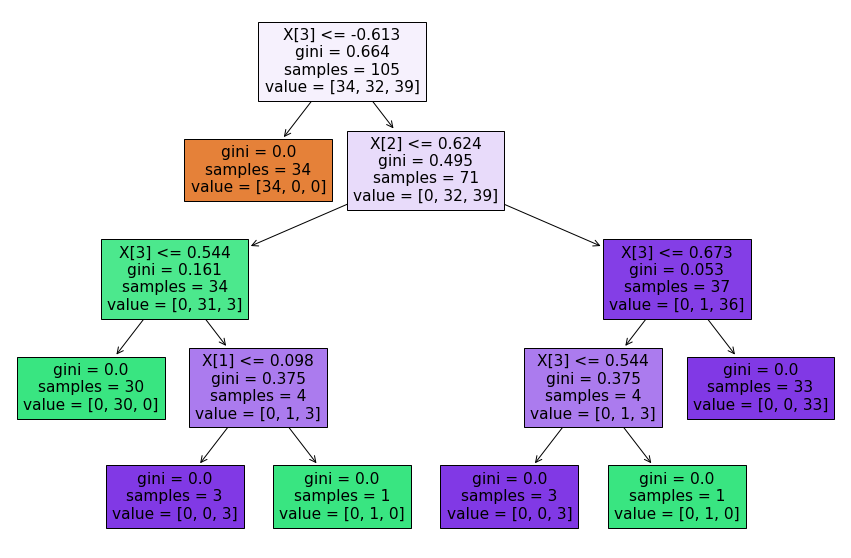

In [23]:
text_visual=tree.export_text(model)
print(text_visual)
fig=plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

#### Predictions using the model

In [24]:
y_pred=clf.predict (X_test)

#### Evaluating the Model

In [25]:
from sklearn.metrics import classification_report,accuracy_score

In [26]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [31]:
print("Accuracy Score",accuracy_score(y_test,y_pred)*100)

Accuracy Score 97.77777777777777
